In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-liver-patient-records/indian_liver_patient.csv


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [27]:
# loading data
data = pd.read_csv('/kaggle/input/indian-liver-patient-records/indian_liver_patient.csv')
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [29]:
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

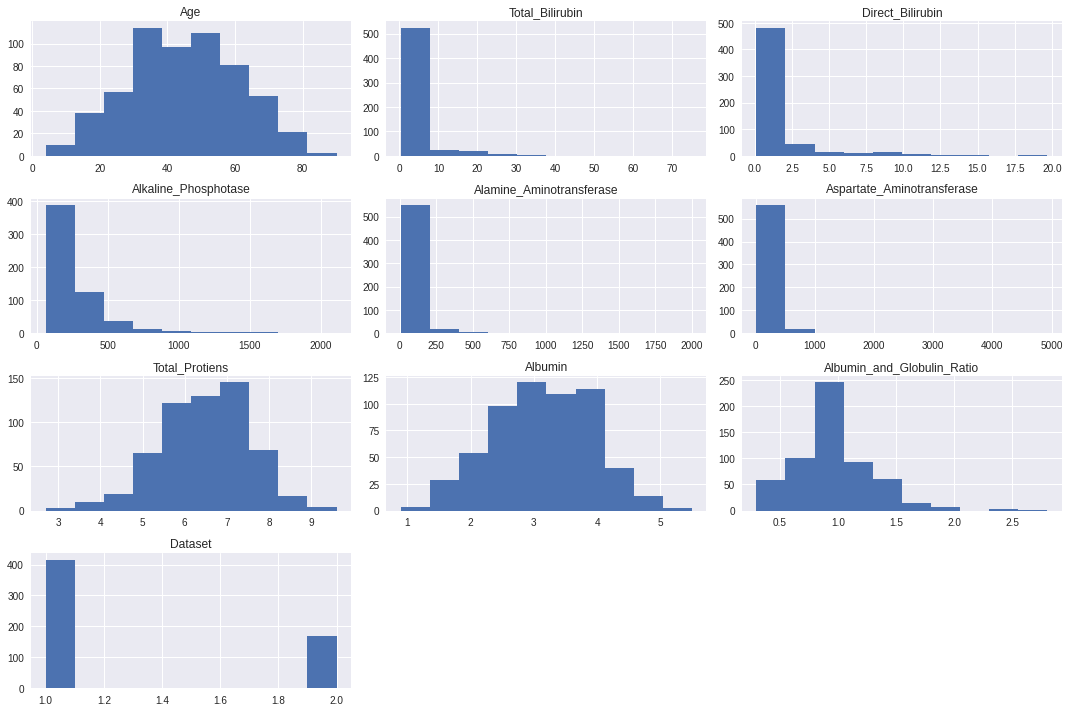

In [30]:
# data distribution
data.select_dtypes(include= [np.int64, np.float64]).hist(figsize = (15,10))
plt.tight_layout()
plt.show()

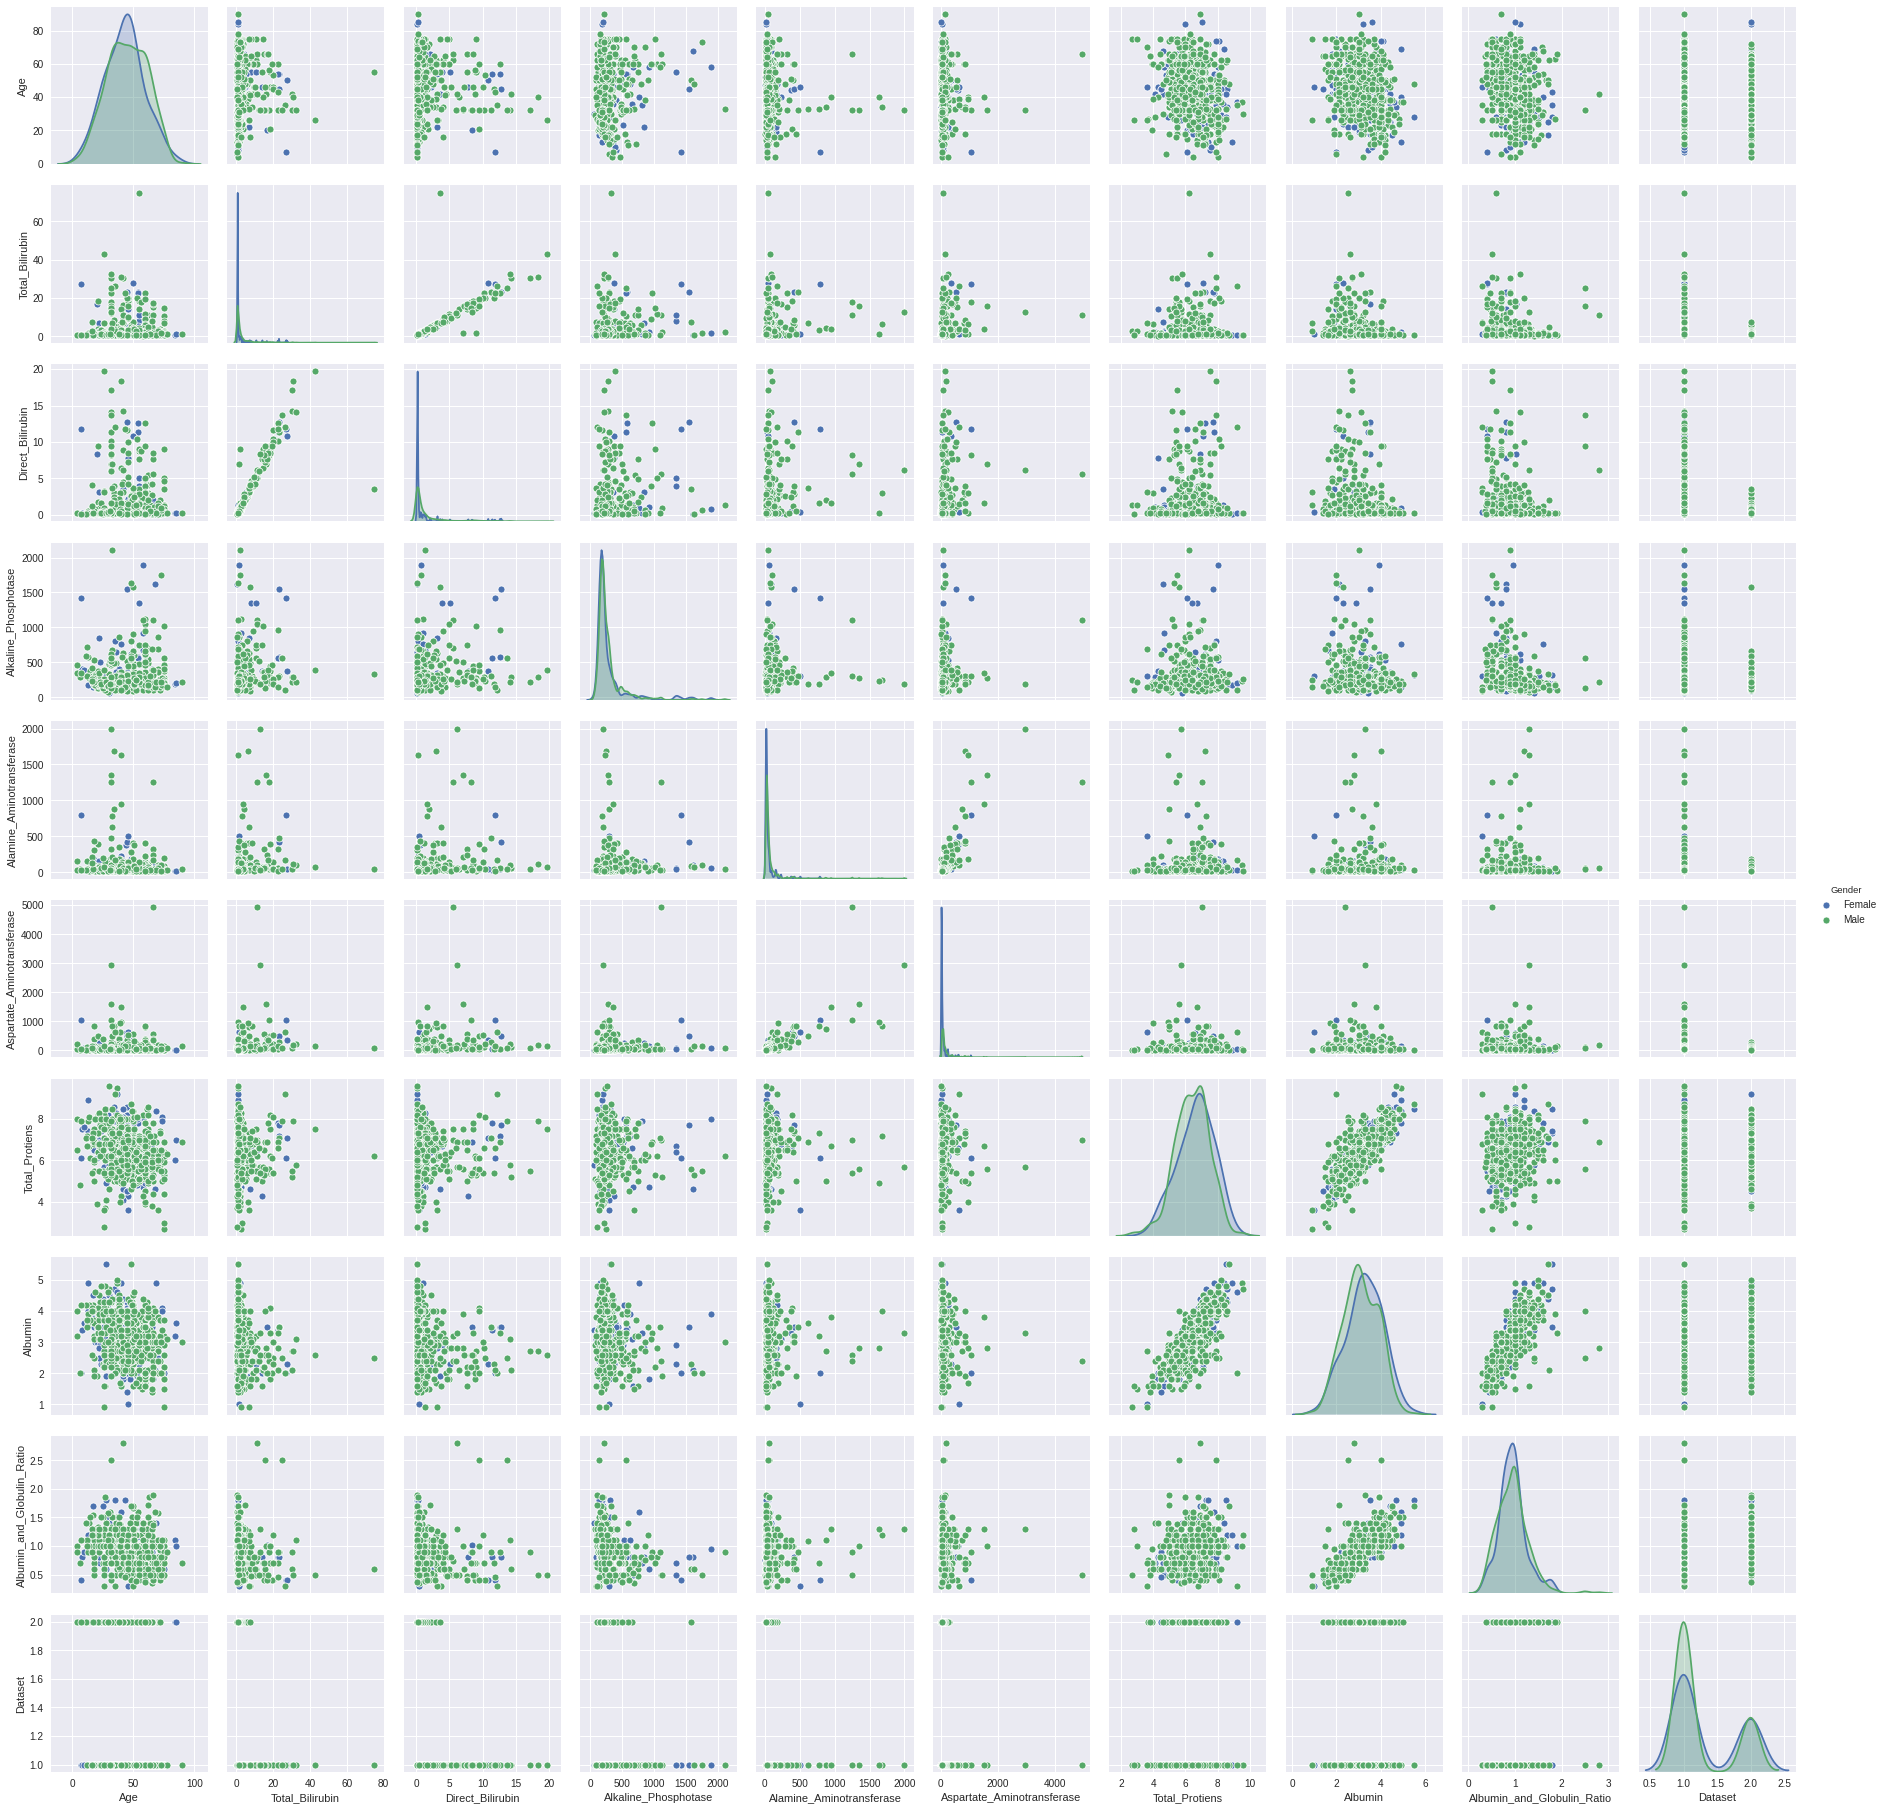

In [31]:
# pairplot
sns.pairplot(data, hue = 'Gender')
plt.show()

In [32]:
# crate a new column whether they have disease or not
data['diagnosed'] = data['Dataset'].replace([1,2], ['yes', 'no'])
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,diagnosed
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,yes
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,yes
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,yes
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,yes
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,yes


In [33]:
# drop the column Dataset from data
data.drop(columns= ['Dataset'], axis = 1, inplace= True)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,diagnosed
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,yes
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,yes
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,yes
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,yes
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,yes


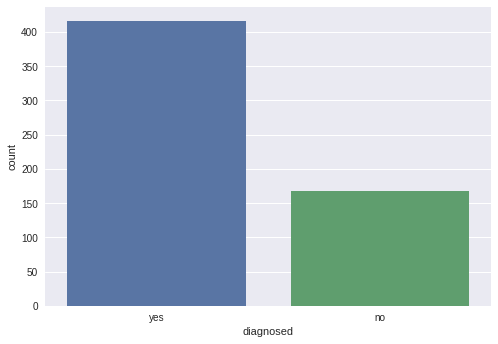

In [34]:
# ploting diagnosed 
sns.countplot(x = 'diagnosed', data = data)
plt.show()

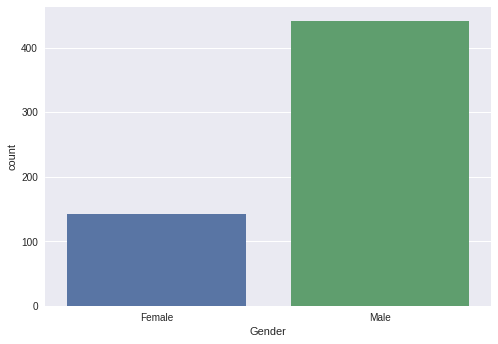

In [35]:
# ploting gender
sns.countplot(x = 'Gender', data = data)
plt.show()

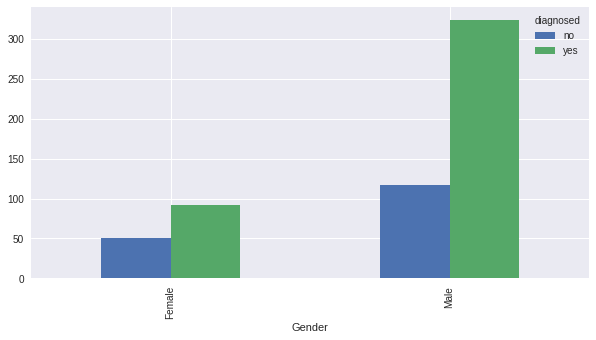

In [39]:
pd.crosstab(data['Gender'], data['diagnosed']).plot(kind = 'bar', figsize = (10,5))
plt.show()

In [42]:
# average age of male and female diagnosed with it.
data.groupby(['Gender', 'diagnosed'])['Age'].mean()

Gender  diagnosed
Female  no           42.740000
        yes          43.347826
Male    no           40.598291
        yes          46.950617
Name: Age, dtype: float64

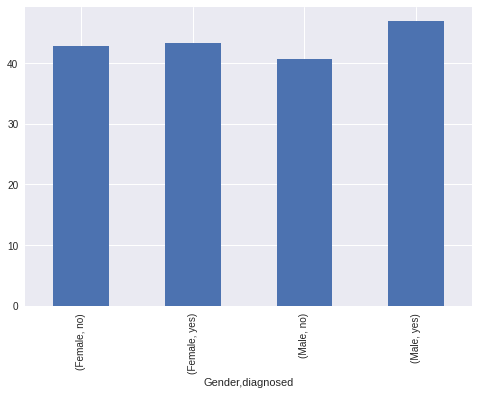

In [41]:
# average age of male and female diagnosed with it.
data.groupby(['Gender', 'diagnosed'])['Age'].mean().plot(kind = 'bar')
plt.show()

In [48]:
# gender & diagnosed wise min values
data.groupby(['Gender', 'diagnosed']).agg(
    min_Total_Bilirubin = ('Total_Bilirubin', min),
    min_Direct_Bilirubin = ('Direct_Bilirubin', min),
    min_Alkaline_Phosphotase = ('Alkaline_Phosphotase', min),
    min_Alamine_Aminotransferase = ('Alamine_Aminotransferase', min),
    min_Total_Protiens = ('Total_Protiens', min),
    min_Albumin = ('Albumin', min),
    min_Albumin_and_Globulin_Ratio = ('Albumin_and_Globulin_Ratio', min)
    )


min_Total_Bilirubin  min_Direct_Bilirubin  \
Gender diagnosed                                              
Female no                         0.5                   0.1   
       yes                        0.5                   0.1   
Male   no                         0.5                   0.1   
       yes                        0.4                   0.1   

                  min_Alkaline_Phosphotase  min_Alamine_Aminotransferase  \
Gender diagnosed                                                           
Female no                               90                            10   
       yes                              63                            12   
Male   no                              100                            10   
       yes                              75                            12   

                  min_Total_Protiens  min_Albumin  \
Gender diagnosed                                    
Female no                        4.5          1.4   
       yes                       3.6          1.0   
Male   no                        3.7          1.4   
       yes                       2.7          0.9   

                  min_Albumin_and_Globulin_Ratio  
Gender diagnosed                                  
Female no                                   0.45  
       yes                                  0.30  
Male   no                                   0.37  
       yes                                  0.30

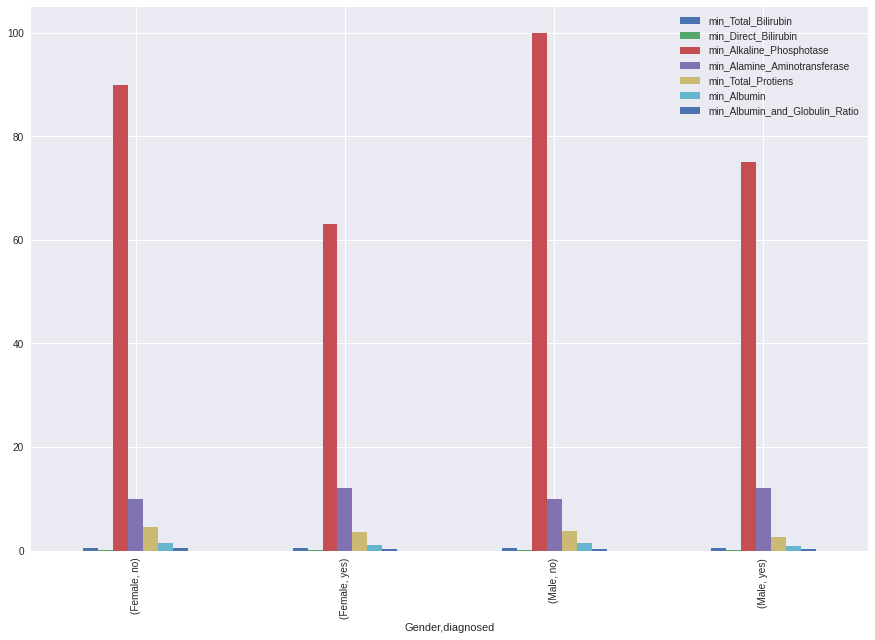

In [54]:
data.groupby(['Gender', 'diagnosed']).agg(
    min_Total_Bilirubin = ('Total_Bilirubin', min),
    min_Direct_Bilirubin = ('Direct_Bilirubin', min),
    min_Alkaline_Phosphotase = ('Alkaline_Phosphotase', min),
    min_Alamine_Aminotransferase = ('Alamine_Aminotransferase', min),
    min_Total_Protiens = ('Total_Protiens', min),
    min_Albumin = ('Albumin', min),
    min_Albumin_and_Globulin_Ratio = ('Albumin_and_Globulin_Ratio', min)
    ).plot(kind = 'bar', figsize = (15,10))
plt.show()

In [49]:
# gender & diagnosed wise min values
data.groupby(['Gender', 'diagnosed']).agg(
    max_Total_Bilirubin = ('Total_Bilirubin', max),
    max_Direct_Bilirubin = ('Direct_Bilirubin', max),
    max_Alkaline_Phosphotase = ('Alkaline_Phosphotase', max),
    max_Alamine_Aminotransferase = ('Alamine_Aminotransferase', max),
    max_Total_Protiens = ('Total_Protiens', max),
    max_Albumin = ('Albumin', max),
    max_Albumin_and_Globulin_Ratio = ('Albumin_and_Globulin_Ratio', max)
    )

max_Total_Bilirubin  max_Direct_Bilirubin  \
Gender diagnosed                                              
Female no                         2.6                   1.2   
       yes                       27.7                  12.8   
Male   no                         7.3                   3.6   
       yes                       75.0                  19.7   

                  max_Alkaline_Phosphotase  max_Alamine_Aminotransferase  \
Gender diagnosed                                                           
Female no                              509                           160   
       yes                            1896                           790   
Male   no                             1580                           181   
       yes                            2110                          2000   

                  max_Total_Protiens  max_Albumin  \
Gender diagnosed                                    
Female no                        9.2          4.9   
       yes                       8.9          5.5   
Male   no                        8.5          5.0   
       yes                       9.6          5.5   

                  max_Albumin_and_Globulin_Ratio  
Gender diagnosed                                  
Female no                                    1.8  
       yes                                   1.8  
Male   no                                    1.9  
       yes                                   2.8

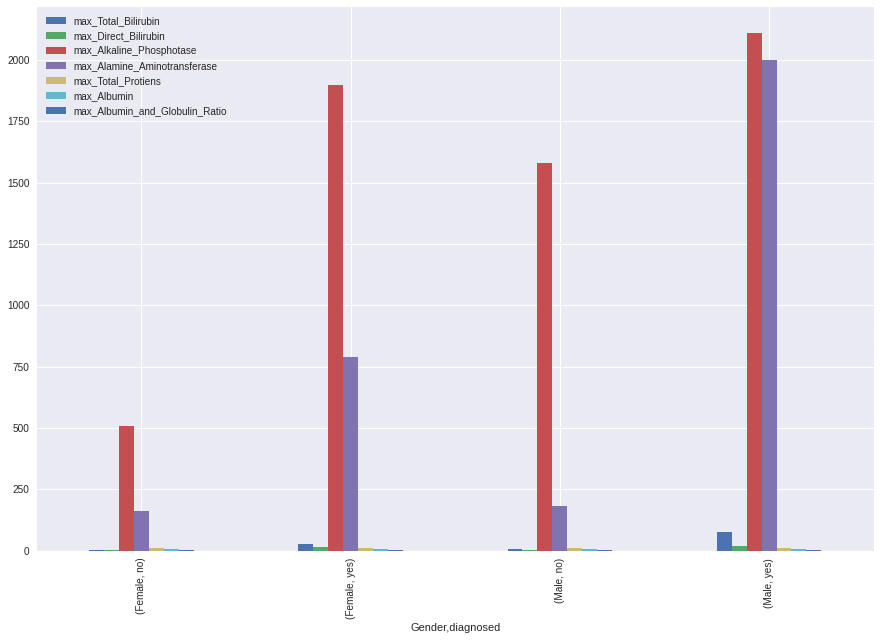

In [52]:
data.groupby(['Gender', 'diagnosed']).agg(
    max_Total_Bilirubin = ('Total_Bilirubin', max),
    max_Direct_Bilirubin = ('Direct_Bilirubin', max),
    max_Alkaline_Phosphotase = ('Alkaline_Phosphotase', max),
    max_Alamine_Aminotransferase = ('Alamine_Aminotransferase', max),
    max_Total_Protiens = ('Total_Protiens', max),
    max_Albumin = ('Albumin', max),
    max_Albumin_and_Globulin_Ratio = ('Albumin_and_Globulin_Ratio', max)
    ).plot(kind = 'bar', figsize =(15,10))
plt.show()

In [55]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'diagnosed'],
      dtype='object')

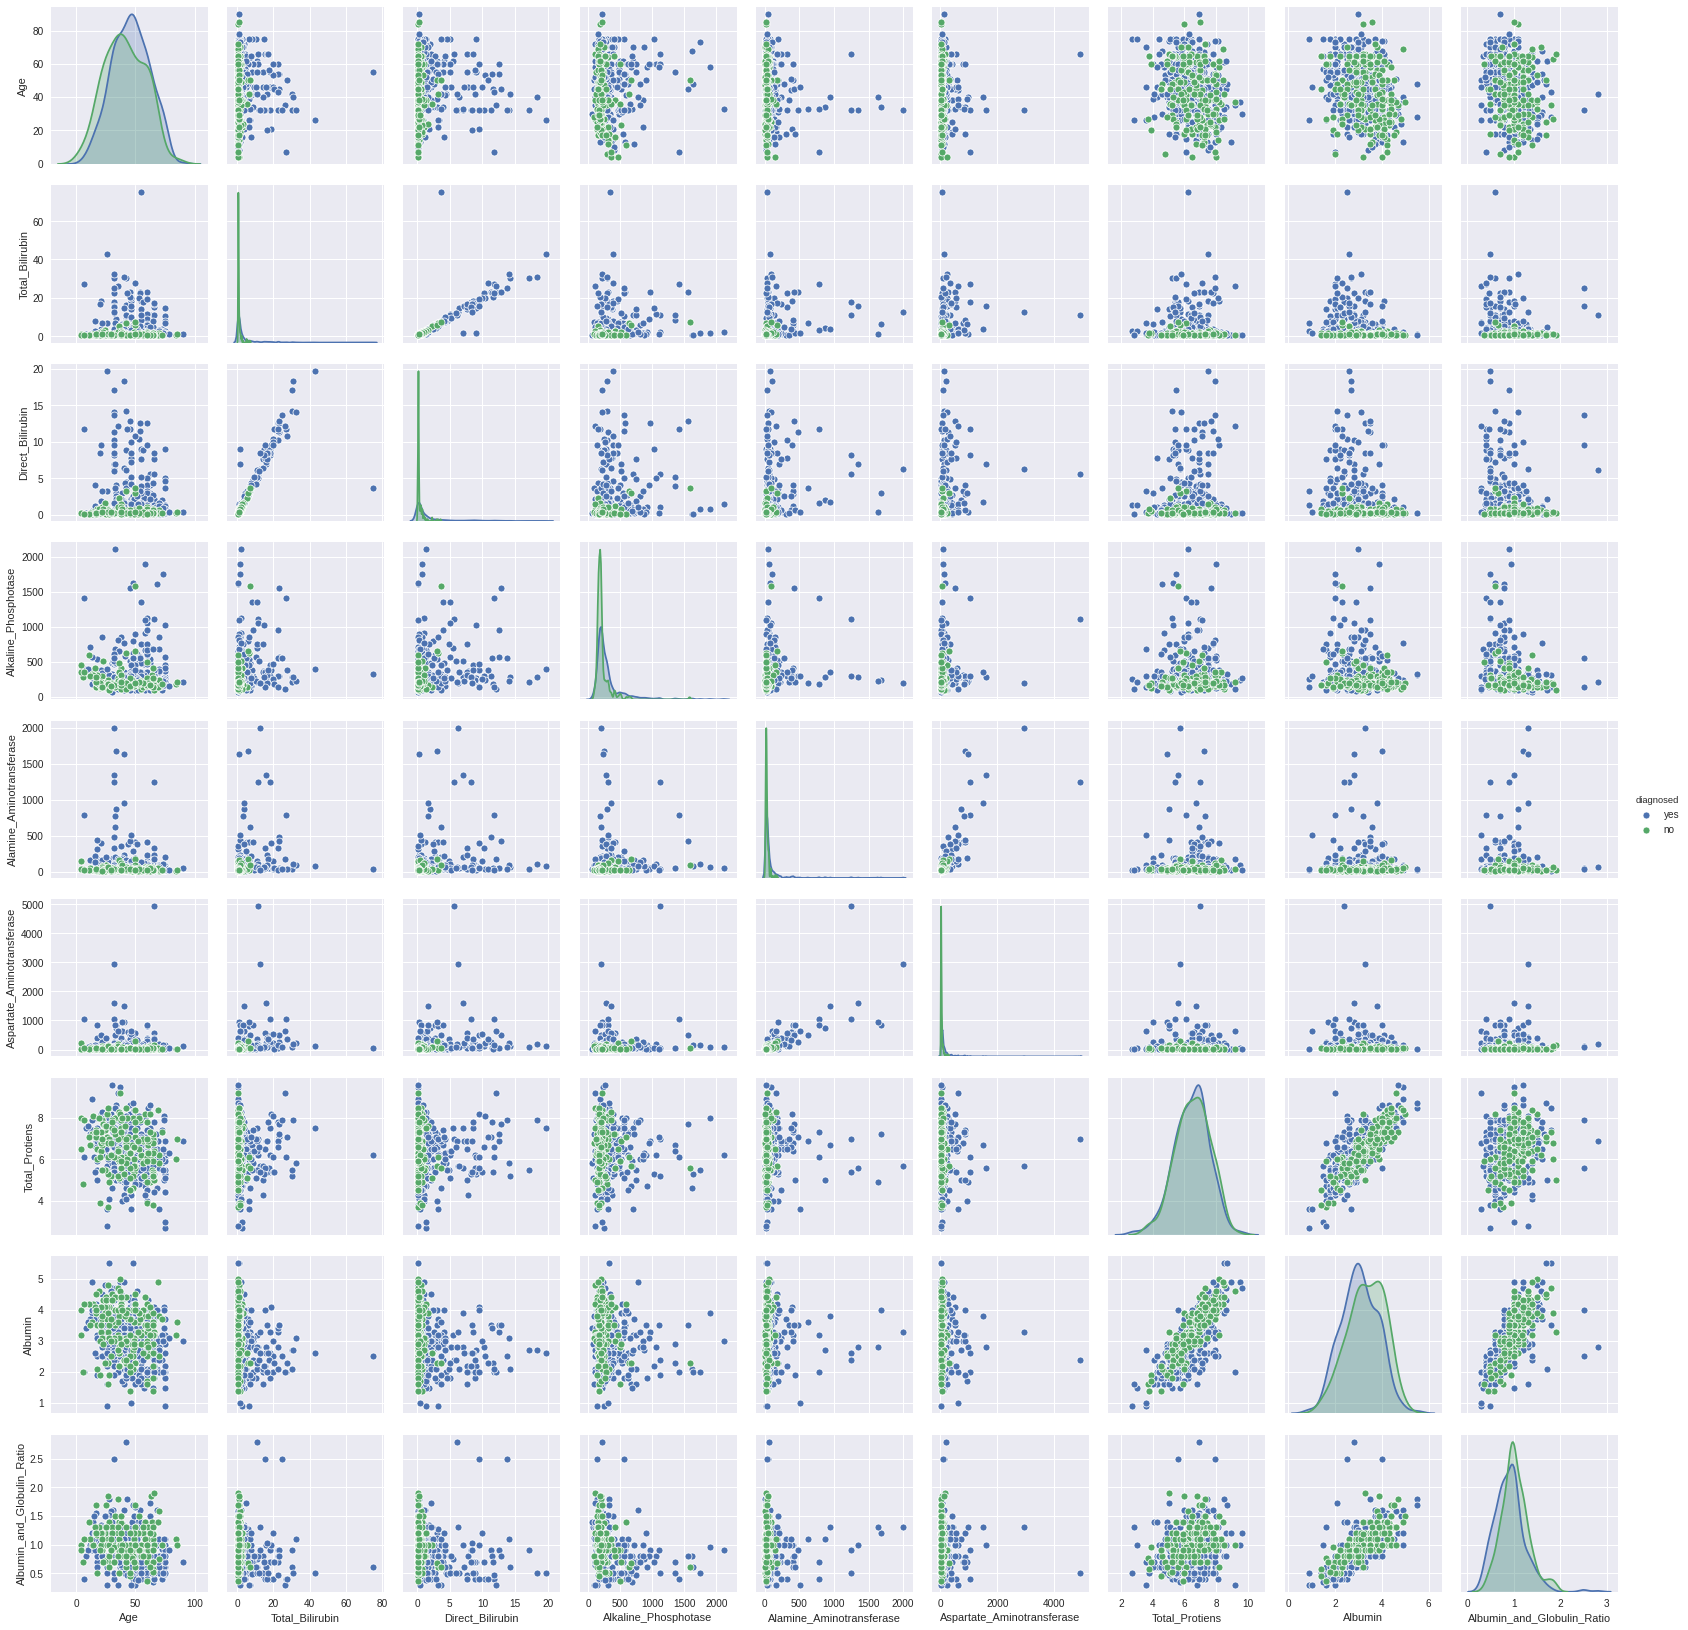

In [56]:
sns.pairplot(data.drop('Gender', axis = 1), hue = 'diagnosed')
plt.show()